<a href="https://colab.research.google.com/github/Hriday1824/Image-Processing/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ds=sns.load_dataset(name="iris")

display(ds)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Q.1 Estimate the covariance matrix of the 4 attributes.

In [ ]:
sl=ds["sepal_length"]
sw=ds["sepal_width"]
pl=ds["petal_length"]
pw=ds["petal_width"]

def MV(a):
  s=0
  S=0
  for i in a:
    s+=i
  m=s/len(a)
  for i in a:
    S+=(i-m)**2
  v=S/len(a)
  return m,v

def standardization(l):
  df=[0]*len(l)
  E,V=MV(l)
  for i in range(len(l)):
    df[i]=(l[i]-E)/(V**0.5)
  return df

SL=standardization(sl)
SW=standardization(sw)
PL=standardization(pl)
PW=standardization(pw)

print("\033[1m"+"Standardised Sepal Length: "+"\033[0m",SL)
L=[SL,SW,PL,PW]

def covariance(a,b):
  Ma,Va=MV(a)
  Mb,Vb=MV(b)
  S=0
  for i in range(len(a)):
    S+=(a[i]-Ma)*(b[i]-Mb)
  cov=S/len(a)
  return cov

cov_mat=np.zeros((4,4))

for i in range(len(L)):
  for j in range(len(L)):
    cov_mat[i,j]=covariance(L[i],L[j])

print("\033[1m"+"The Covariance matrix is "+"\033[0m")
print(cov_mat)

Standardised Sepal Length:  [-0.9006811702978099, -1.1430169111851116, -1.3853526520724144, -1.5065205225160663, -1.0218490407414607, -0.5371775589668552, -1.5065205225160663, -1.0218490407414607, -1.748856263403368, -1.1430169111851116, -0.5371775589668552, -1.2641847816287635, -1.2641847816287635, -1.87002413384702, -0.052506077192250644, -0.1736739476359015, -0.5371775589668552, -0.9006811702978099, -0.1736739476359015, -0.9006811702978099, -0.5371775589668552, -0.9006811702978099, -1.5065205225160663, -0.9006811702978099, -1.2641847816287635, -1.0218490407414607, -1.0218490407414607, -0.779513299854158, -0.779513299854158, -1.3853526520724144, -1.2641847816287635, -0.5371775589668552, -0.779513299854158, -0.4160096885232043, -1.1430169111851116, -1.0218490407414607, -0.4160096885232043, -1.1430169111851116, -1.748856263403368, -0.9006811702978099, -1.0218490407414607, -1.6276883929597172, -1.748856263403368, -1.0218490407414607, -0.9006811702978099, -1.2641847816287635, -0.90068117

# Q.2 Estimate the four principal components of the data.


The eigen vectors are the principal components

The eigen vector corresponding to the eigenvalue 2.918497816531996 is [ 0.52106591 -0.37741762 -0.71956635  0.26128628]

The eigen vector corresponding to the eigenvalue 0.9140304714680689 is [-0.26934744 -0.92329566  0.24438178 -0.12350962]

The eigen vector corresponding to the eigenvalue 0.14675687557131445 is [ 0.5804131  -0.02449161  0.14212637 -0.80144925]

The eigen vector corresponding to the eigenvalue 0.020714836428619588 is [ 0.56485654 -0.06694199  0.63427274  0.52359713]



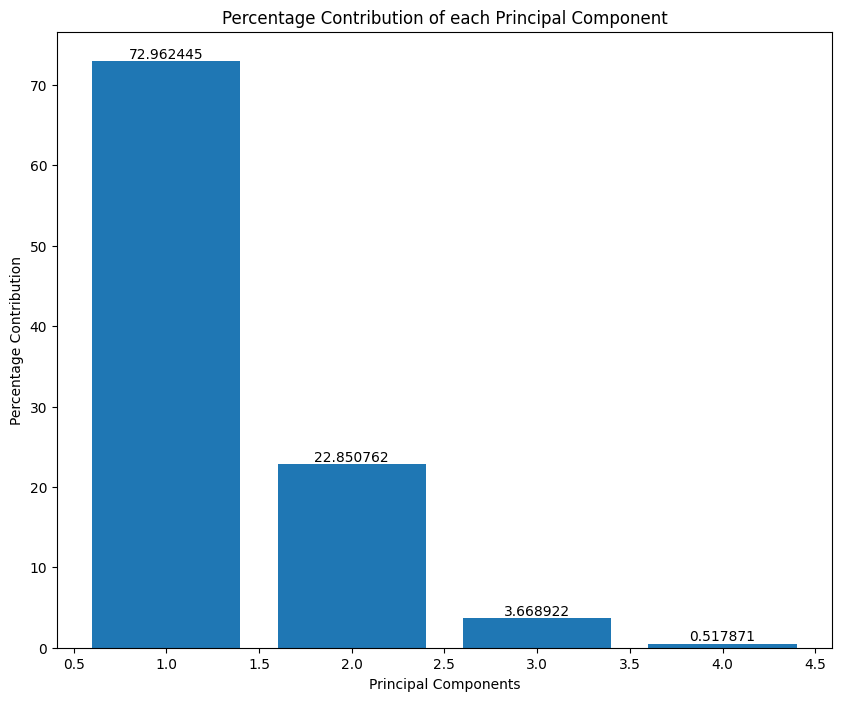

In [ ]:
eigen_values,eigen_vectors=np.linalg.eig(cov_mat)

print("\033[1m"+"The eigen vectors are the principal components"+"\033[0m")

print()

for i in range(len(eigen_values)):
  print(f"The eigen vector corresponding to the eigenvalue {eigen_values[i]} is {eigen_vectors[i]}")
  print()

percent_contri=[]

for i in range(len(eigen_values)):
  percent_contri.append((eigen_values[i]/np.sum(eigen_values))*100)

plt.figure(figsize=(10,8))
A=plt.bar(range(1,len(eigen_values)+1),percent_contri)
plt.ylabel("Percentage Contribution")
plt.xlabel("Principal Components")
plt.title("Percentage Contribution of each Principal Component")
for bar, ratio in zip(A, percent_contri):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), '{:.6f}'.format(ratio), ha='center', va='bottom')
plt.show()

# Q.3 Perform dimensionality reduction using PCA to reduce 150 data points into two dimensions and three dimensions.

In [ ]:
original_shape=(np.dot(np.transpose(np.array([SL,SW,PL,PW])),eigen_vectors)).shape
print("The orignial shape of the dataset :",original_shape)

print()

print("\033[1m"+"Here we can reduce the dimension to 3 by removing the eigenvector corresponding to the eigenvalue = 0.020714836428619588"+"\033[0m")

print()

principal_components_3D=eigen_vectors[:,:3]
principal_components_3D=np.transpose(principal_components_3D)

print("Principal Components after dimensionally reducing one time:")

print(principal_components_3D)

print()

Matrix_3D_dataset=(np.dot(np.transpose(np.array([SL,SW,PL,PW])),eigen_vectors[:,:3]))
Dim_red_1st_shape=(np.dot(np.transpose(np.array([SL,SW,PL,PW])),eigen_vectors[:,:3])).shape
print("The shape of the dataset after dimensionally reducing one time :",Dim_red_1st_shape)

print()

print("\033[1m"+"Here we can reduce the dimension to 2 by removing the eigenvector corresponding to the eigenvalue = 0.14675687557131445"+"\033[0m")

print()

Matrix_2D_dataset=(np.dot(np.transpose(np.array([SL,SW,PL,PW])),eigen_vectors[:,:2]))
principal_components_2D=eigen_vectors[:,:2]
principal_components_2D=np.transpose(principal_components_2D)

print("Principal Components after dimensionally reducing two times:")

print(principal_components_2D)

print()

Dim_red_2nd_shape=(np.dot(np.transpose(np.array([SL,SW,PL,PW])),eigen_vectors[:,:2])).shape
print("The shape of the dataset after dimensionally reducing two times :",Dim_red_2nd_shape)

print()

The orignial shape of the dataset : (150, 4)

Here we can reduce the dimension to 3 by removing the eigenvector corresponding to the eigenvalue = 0.020714836428619588

Principal Components after dimensionally reducing one time:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]

The shape of the dataset after dimensionally reducing one time : (150, 3)

Here we can reduce the dimension to 2 by removing the eigenvector corresponding to the eigenvalue = 0.14675687557131445

Principal Components after dimensionally reducing two times:
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [-0.37741762 -0.92329566 -0.02449161 -0.06694199]]

The shape of the dataset after dimensionally reducing two times : (150, 2)



# Q.4 Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of diff different species.

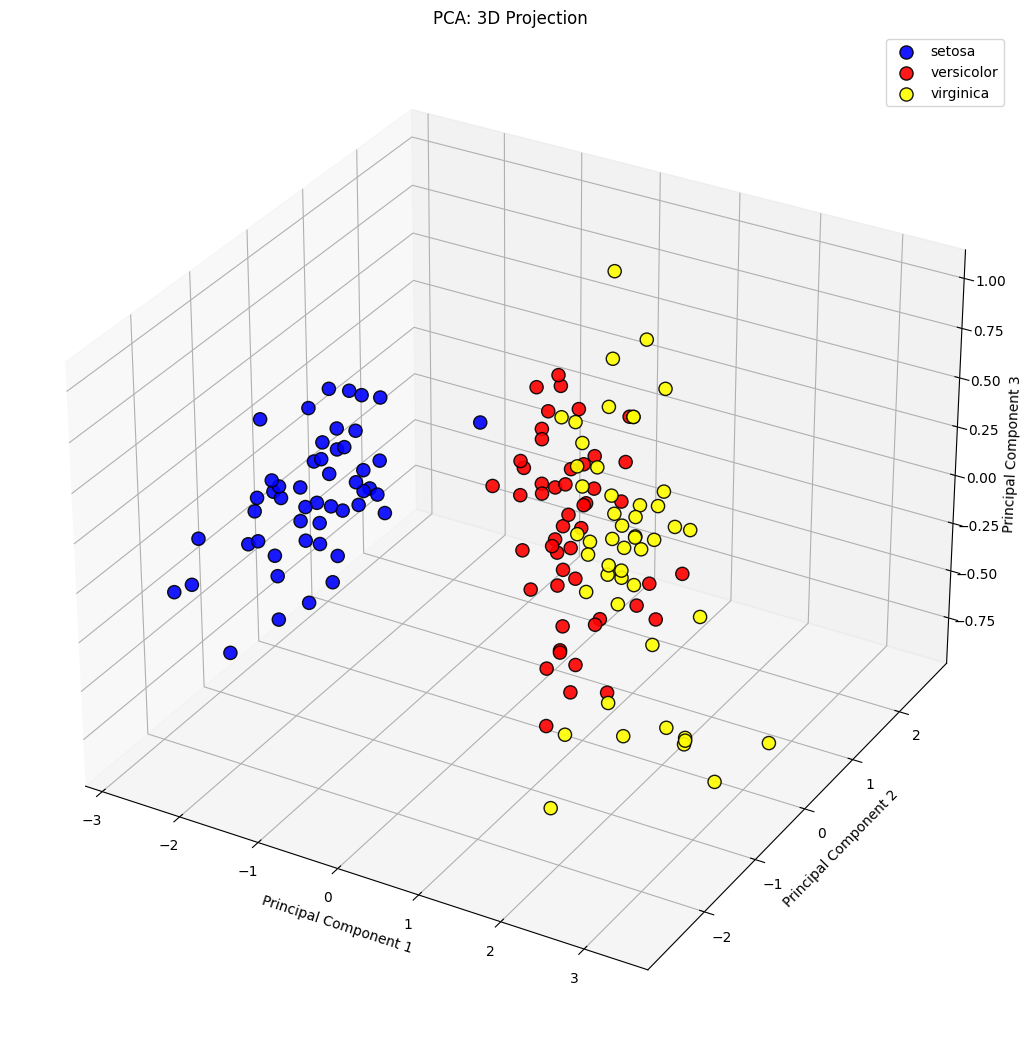

In [ ]:
colors={"setosa":"blue","versicolor":"red","virginica":"yellow"}
fig=plt.figure(figsize=(13,13))

ax=fig.add_subplot(111,projection="3d")
for species in ds["species"].unique():
  ax.scatter(Matrix_3D_dataset[ds["species"]==species,0],Matrix_3D_dataset[ds["species"]==species,1],Matrix_3D_dataset[ds["species"]==species,2],color=colors[species],label=species,alpha=0.9,edgecolors="black",s=90)
ax.set_title("PCA: 3D Projection")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()

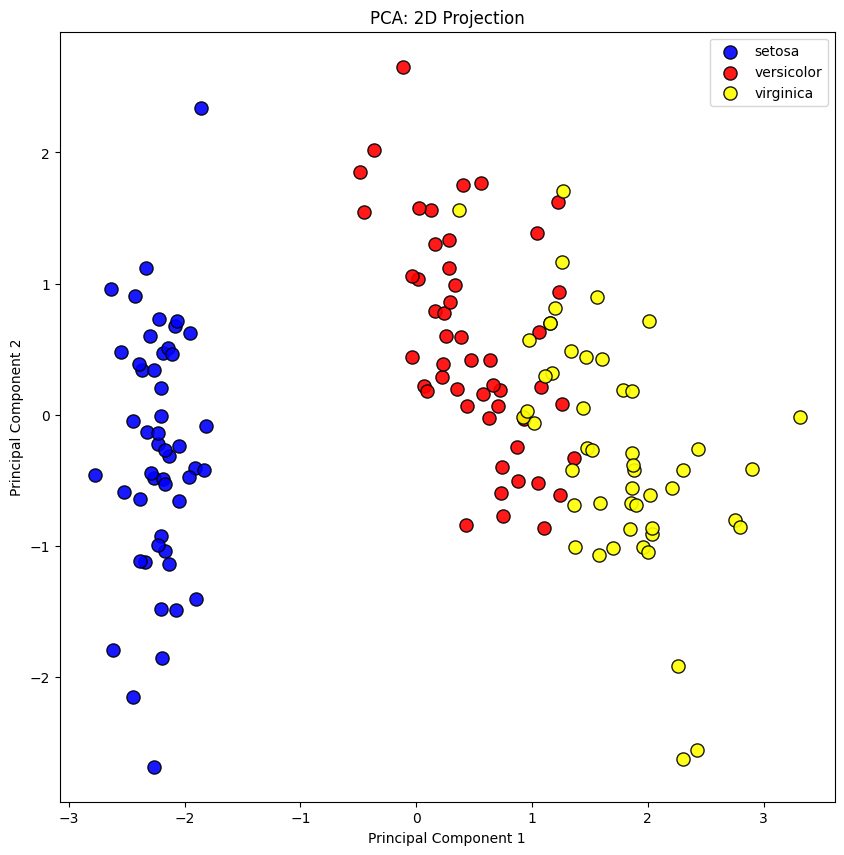

In [ ]:
colors={"setosa":"blue","versicolor":"red","virginica":"yellow"}
fig=plt.figure(figsize=(10,10))

for species in ds["species"].unique():
  plt.scatter(Matrix_2D_dataset[ds["species"]==species,0],Matrix_2D_dataset[ds["species"]==species,1],color=colors[species],label=species,s=90,edgecolors="black",alpha=0.9)
plt.title("PCA: 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()